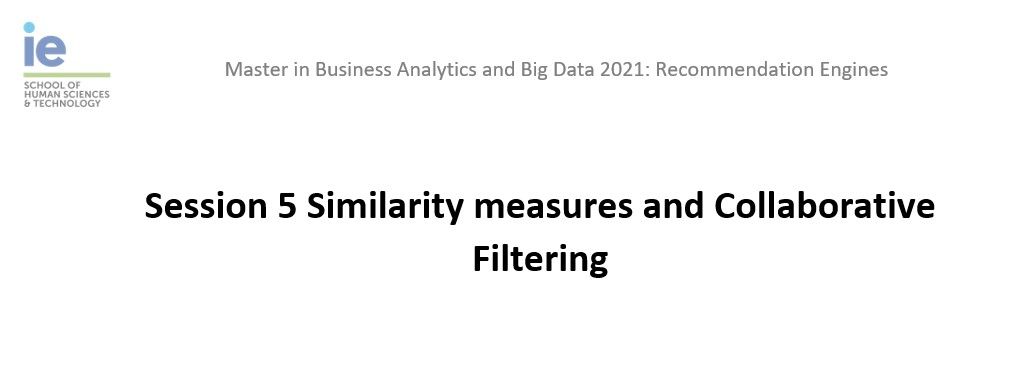

# Similarities 

In our previous session we covered how to measure similarities among users or items. In this section we are going to put that in practice.

In [1]:
import pandas as pd

In [2]:
movielens = pd.read_csv('ratings.csv')
movielens_meta = pd.read_csv('movies.csv')
data = movielens.merge(movielens_meta,on='movieId', how='left')
rat_mat = data.pivot_table(index='userId',columns='title',values='rating')
rat_mat.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can select a specific user by using the following:

In [3]:
rat_mat.loc[1]

title
'71 (2014)                                   NaN
'Hellboy': The Seeds of Creation (2004)      NaN
'Round Midnight (1986)                       NaN
'Salem's Lot (2004)                          NaN
'Til There Was You (1997)                    NaN
                                            ... 
eXistenZ (1999)                              NaN
xXx (2002)                                   NaN
xXx: State of the Union (2005)               NaN
¡Three Amigos! (1986)                        4.0
À nous la liberté (Freedom for Us) (1931)    NaN
Name: 1, Length: 9719, dtype: float64

## Exercise
Select two users such as their rating mean and variance are really different. What is the problem you can spot about having such differences? 

In [4]:
#Your code here
# User 1
print(rat_mat.loc[1].mean())
print(rat_mat.loc[1].var())
print(rat_mat.loc[1].value_counts())

# User 55
print(rat_mat.loc[55].mean())
print(rat_mat.loc[55].var())
print(rat_mat.loc[55].value_counts())


4.366379310344827
0.6400768771458442
5.0    124
4.0     76
3.0     26
2.0      5
1.0      1
Name: 1, dtype: int64
2.84
3.223333333333333
0.5    7
5.0    5
4.0    4
4.5    2
2.5    2
3.0    2
3.5    1
2.0    1
1.0    1
Name: 55, dtype: int64


Explanation

As noticed previously, the count of values is unequal; hence, the number of evaluations developed by both users are not comparable in size. Furthermore, it is observed that User ID 55 presents several outliers, as it does present a high variance and has several more values than User ID 1 eventhough it has much more views. Finally, the average does not make real recognition of which types of movies they are referring to.

## Exercise
What could we do for solving our previous problem? Please code a solution and explain it.

Explanation

First we tried to find the Users that present comparable frames of data by using the value_counts function. Once recognized, the variance of those users were added and compared. At the end of this section we present the results as a basic general approach.

In [5]:
#Your code here
print(data['userId'].value_counts())

414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
406      20
595      20
569      20
431      20
442      20
Name: userId, Length: 610, dtype: int64


In [6]:
print(rat_mat.loc[414].mean())
print(rat_mat.loc[414].var())


print(rat_mat.loc[599].mean())
print(rat_mat.loc[599].var())

3.391957005189029
0.8710624645949513
2.6420500403551253
0.6647147298324834


In [7]:
var_per_user = pd.DataFrame(data.groupby('userId').agg(Var_Ratings=('rating','var')))
print(var_per_user)
mean_per_user = pd.DataFrame(data.groupby('userId').agg(Mean_Ratings=('rating','mean')))
print(mean_per_user)

        Var_Ratings
userId             
1          0.640077
2          0.649015
3          4.370783
4          1.727132
5          0.980973
...             ...
606        0.524351
607        0.932494
608        1.164807
609        0.202703
610        0.735173

[610 rows x 1 columns]
        Mean_Ratings
userId              
1           4.366379
2           3.948276
3           2.435897
4           3.555556
5           3.636364
...              ...
606         3.657399
607         3.786096
608         3.134176
609         3.270270
610         3.688556

[610 rows x 1 columns]


In [8]:
selected_var_per_user = var_per_user[var_per_user < 0.2]
print(selected_var_per_user.dropna())
selected_mean_per_user = mean_per_user[mean_per_user > 4]
print(selected_mean_per_user.dropna())

        Var_Ratings
userId             
25         0.141538
49         0.065476
53         0.000000
54         0.155303
123        0.135065
189        0.121053
348        0.187205
515        0.115385
        Mean_Ratings
userId              
1           4.366379
12          4.390625
17          4.209524
25          4.807692
29          4.141975
...              ...
585         4.336066
586         4.365385
589         4.025000
595         4.200000
601         4.425743

[143 rows x 1 columns]


In this case, similar individuals are been selected according to a similar variance. This is due to the premise that there are less outliers within those individuals and they should present a much better distribution. However; there is still the issue of the mean, which does not portrays necessarily the similarities between users.

As you already know distances are key in recommendation engines. We can use scipy to calculate some distances. But before we need to impute NaNs.

In [9]:
import copy
user_a = rat_mat.loc[1]
user_aa = copy.copy(user_a)
user_aa[user_aa.isna()]=0
user_b = rat_mat.loc[3]
user_bb = copy.copy(user_b)
user_bb[user_bb.isna()]=0

In [10]:
from scipy.spatial import distance
distance.euclidean(user_aa, user_bb)

69.33613776379529

## Exercise
Select all movies rated by the two users and calculate the distance only using these ratings. Explain the differences.

In [11]:
# Your code here
user_a = rat_mat.loc[414]
user_aa = copy.copy(user_a)
user_aa[user_aa.isna()]=0
user_b = rat_mat.loc[599]
user_bb = copy.copy(user_b)
user_bb[user_bb.isna()]=0

distance.euclidean(user_aa, user_bb)

157.35390049185307

Explanation

We can observe that the previously selected users, 414 and 599, eventhough they had a low and similar variance; they do presented a very high euclidean distance. Hence, they are pretty different subjects.

## Exercise
Use cosine distance instead of euclidean. Explain the differences.

In [12]:
# Your code here
distance.cosine(user_aa, user_bb)

0.45181301408474195

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

c_user_aa=user_aa.values.reshape(1,-1)
c_user_bb=user_bb.values.reshape(1,-1)
similarity_c_users=cosine_similarity(c_user_aa,c_user_bb)
print(similarity_c_users)

[[0.54818699]]


Explanation

Now changing to the use of cosine distance, users 414 and 599 do present a certain degree of similarity. In this case the difference relies in the fact that euclidean model depends on the distance between the two selected points meanwhile the cosine model uses the angle formed between those two points. Hence, now it is obervable that the cosine distance is 0.45, which is relatively low while the cosine similarity is of 0.548, which at the same time re states that they have something in common. Perfect similar users would have 1 of cosine similarity.

# Recommendation models

The surprise package contains some options for the recommendation algorithm. We can see te models available here:
https://surprise.readthedocs.io/en/stable/prediction_algorithms_package.html

To load a data set from the above pandas data frame, we will use the load_from_df() method in the following way:

In [14]:
from surprise import Reader, Dataset
reader = Reader()
data_surp = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

## Collaborative filtering


We will build the model using a part of the MovieLense dataset (the training set) and apply it on the other part (the test set). Since it's not a topic of this session, we will not evaluate the model, but will only recommend movies to the users in the test set.

The two sets are as follows:
- Training set: This set includes users from which the model learns.
- Test set: This set includes users to whom we recommend movies.

In [15]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data_surp, test_size=.25)

## Exercise
Change the size of train set to 80%

In [16]:
#Your code here

from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data_surp, test_size=.20)

To create a collaborative filtering algorithm we can use KNNBasic method of surprise package. First of all we load the method, we create the algorithm and we use it to fit it with the train set and predict with the test set.

In [17]:
from surprise import KNNBasic
knn = KNNBasic()
predictions = knn.fit(trainset).test(testset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [18]:
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df

,uid,iid,rui,est,details
0,599,6800,2.0,2.531943,"{'actual_k': 2, 'was_impossible': False}"
1,275,2391,4.0,3.695169,"{'actual_k': 15, 'was_impossible': False}"
2,89,4701,4.0,3.132029,"{'actual_k': 23, 'was_impossible': False}"
3,1,592,4.0,3.732173,"{'actual_k': 40, 'was_impossible': False}"
4,380,653,3.0,3.297930,"{'actual_k': 40, 'was_impossible': False}"
...,...,...,...,...,...
20163,256,117529,4.0,3.466058,"{'actual_k': 16, 'was_impossible': False}"
20164,164,1047,4.0,3.266420,"{'actual_k': 26, 'was_impossible': False}"
20165,599,1401,2.0,4.000000,"{'actual_k': 2, 'was_impossible': False}"
20166,122,96728,5.0,3.754030,"{'actual_k': 4, 'was_impossible': False}"


## Exercise
Get the best 10 and worst 10 predictions based on Absolute Error. Can you explain any of the worst/best predictions?

In [19]:
#Your code here

# For adding the number of items rated by certain user.

def get_items_rated(uid):
  
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:  
        return 0
    
# For adding the number of users that rated certain item.
    
def get_users_rated(iid):
  
    try:
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:  # item was not part of the trainset
        return 0

df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])    
df['items_rated'] = df.uid.apply(get_items_rated)
df['users_rated'] = df.iid.apply(get_users_rated)
df['err'] = abs(df.est - df.rui)

In [20]:
worst_predictions = df.sort_values(by='err')[-10:]
print(worst_predictions)

       uid    iid  rui       est                                    details  \
4425   256   5618  0.5  4.213246  {'actual_k': 40, 'was_impossible': False}   
3765   594   2488  0.5  4.227453   {'actual_k': 2, 'was_impossible': False}   
5022   399   2858  0.5  4.250880  {'actual_k': 40, 'was_impossible': False}   
15106  580   1203  0.5  4.274336  {'actual_k': 40, 'was_impossible': False}   
12559    3   1272  0.5  4.300995  {'actual_k': 19, 'was_impossible': False}   
16454  210    296  0.5  4.359162  {'actual_k': 40, 'was_impossible': False}   
7987   105  32892  5.0  1.000000   {'actual_k': 1, 'was_impossible': False}   
5357   594   7564  0.5  4.500000   {'actual_k': 1, 'was_impossible': False}   
11694  603   2068  5.0  1.000000   {'actual_k': 1, 'was_impossible': False}   
4771   395    484  1.0  5.000000   {'actual_k': 1, 'was_impossible': False}   

       items_rated  users_rated       err  
4425           140           72  3.713246  
3765           180            2  3.727453 

In [21]:
best_predictions = df.sort_values(by='err')[:10]
print(best_predictions)


       uid     iid  rui  est                                   details  \
17307  606   48638  3.5  3.5  {'actual_k': 1, 'was_impossible': False}   
3200   603    4789  5.0  5.0  {'actual_k': 1, 'was_impossible': False}   
3183   606    6684  4.0  4.0  {'actual_k': 1, 'was_impossible': False}   
15630  596  114028  4.0  4.0  {'actual_k': 1, 'was_impossible': False}   
7211   599    9005  2.0  2.0  {'actual_k': 1, 'was_impossible': False}   
2307   318   60885  3.5  3.5  {'actual_k': 1, 'was_impossible': False}   
19297  199    8833  3.5  3.5  {'actual_k': 2, 'was_impossible': False}   
7192   606    4977  3.5  3.5  {'actual_k': 1, 'was_impossible': False}   
10442  182    6041  4.0  4.0  {'actual_k': 1, 'was_impossible': False}   
7178   288    4492  3.0  3.0  {'actual_k': 2, 'was_impossible': False}   

       items_rated  users_rated  err  
17307          878            1  0.0  
3200           748            1  0.0  
3183           878            1  0.0  
15630          345           

Explanation

The 10 worst estimated ratings have absolute errors that are greater than 3.6. At the same time, the 10 best estimated ratings present absolute errors of zero. What both have in common, specially the best predictions, the ratings that are being estimated are done considering that those selected movies where only rated once or twice, as seen in the users_rated column. This demonstrates that the prediction is pretty simple as it only has one or two available comparisons.

## Exercise
Use another kNN method with normalization and another with weights and compare and explain the best and worst results of each method.

In [22]:
#Your code here
#kNN method with normalization 

from surprise import KNNWithZScore
knn = KNNWithZScore()
predictions = knn.fit(trainset).test(testset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [23]:
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df

,uid,iid,rui,est,details
0,599,6800,2.0,1.530386,"{'actual_k': 2, 'was_impossible': False}"
1,275,2391,4.0,4.235925,"{'actual_k': 15, 'was_impossible': False}"
2,89,4701,4.0,2.951080,"{'actual_k': 23, 'was_impossible': False}"
3,1,592,4.0,4.234968,"{'actual_k': 40, 'was_impossible': False}"
4,380,653,3.0,3.327104,"{'actual_k': 40, 'was_impossible': False}"
...,...,...,...,...,...
20163,256,117529,4.0,3.875445,"{'actual_k': 16, 'was_impossible': False}"
20164,164,1047,4.0,3.959142,"{'actual_k': 26, 'was_impossible': False}"
20165,599,1401,2.0,3.154937,"{'actual_k': 2, 'was_impossible': False}"
20166,122,96728,5.0,4.597123,"{'actual_k': 4, 'was_impossible': False}"


In [24]:
# For adding the number of items rated by certain user.

def get_items_rated(uid):
  
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:  
        return 0
    
# For adding the number of users that rated certain item.
    
def get_users_rated(iid):
  
    try:
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:  # item was not part of the trainset
        return 0

df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])    
df['items_rated'] = df.uid.apply(get_items_rated)
df['users_rated'] = df.iid.apply(get_users_rated)
df['err'] = abs(df.est - df.rui)

In [25]:
worst_predictions = df.sort_values(by='err')[-10:]
print(worst_predictions)
print("-----------------------------------------------------------------------")

print('Average error is:', worst_predictions['err'].mean())

       uid    iid  rui       est                                    details  \
9693   175  44613  5.0  1.084877   {'actual_k': 1, 'was_impossible': False}   
11694  603   2068  5.0  1.000000   {'actual_k': 1, 'was_impossible': False}   
2011   175  39427  0.5  4.566153   {'actual_k': 2, 'was_impossible': False}   
11371  573   3996  0.5  4.569550  {'actual_k': 40, 'was_impossible': False}   
16454  210    296  0.5  4.581501  {'actual_k': 40, 'was_impossible': False}   
10684  393   1732  0.5  4.621823  {'actual_k': 40, 'was_impossible': False}   
5022   399   2858  0.5  4.641611  {'actual_k': 40, 'was_impossible': False}   
16818  393    778  0.5  4.901303  {'actual_k': 40, 'was_impossible': False}   
3765   594   2488  0.5  4.943242   {'actual_k': 2, 'was_impossible': False}   
5357   594   7564  0.5  4.957881   {'actual_k': 1, 'was_impossible': False}   

       items_rated  users_rated       err  
9693            16            1  3.915123  
11694          748            1  4.000000 

In [26]:
best_predictions = df.sort_values(by='err')[:10]
print(best_predictions)
print("-----------------------------------------------------------------------")

print('Average error is:',best_predictions['err'].mean())
print('Average users that rated a movie is:',best_predictions['users_rated'].mean())

       uid    iid  rui  est                                    details  \
3627   382  91671  1.0  1.0   {'actual_k': 1, 'was_impossible': False}   
5619   599  43904  1.0  1.0   {'actual_k': 3, 'was_impossible': False}   
12910   30  60069  5.0  5.0  {'actual_k': 40, 'was_impossible': False}   
17443   25    527  5.0  5.0  {'actual_k': 40, 'was_impossible': False}   
5407   523  62336  5.0  5.0   {'actual_k': 7, 'was_impossible': False}   
9462   413    593  5.0  5.0  {'actual_k': 40, 'was_impossible': False}   
18561  160    181  1.0  1.0  {'actual_k': 16, 'was_impossible': False}   
18902  177   7121  5.0  5.0   {'actual_k': 1, 'was_impossible': False}   
13729   53   1125  5.0  5.0  {'actual_k': 14, 'was_impossible': False}   
12927   25   2571  5.0  5.0  {'actual_k': 40, 'was_impossible': False}   

       items_rated  users_rated  err  
3627           223            1  0.0  
5619          2004            3  0.0  
12910           27           81  0.0  
17443           21          1

In [27]:
#kNN weighted method

from surprise import KNNWithMeans
knn = KNNWithMeans()
predictions = knn.fit(trainset).test(testset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [28]:
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df

,uid,iid,rui,est,details
0,599,6800,2.0,1.668562,"{'actual_k': 2, 'was_impossible': False}"
1,275,2391,4.0,4.208857,"{'actual_k': 15, 'was_impossible': False}"
2,89,4701,4.0,3.085450,"{'actual_k': 23, 'was_impossible': False}"
3,1,592,4.0,4.235908,"{'actual_k': 40, 'was_impossible': False}"
4,380,653,3.0,3.402105,"{'actual_k': 40, 'was_impossible': False}"
...,...,...,...,...,...
20163,256,117529,4.0,3.881366,"{'actual_k': 16, 'was_impossible': False}"
20164,164,1047,4.0,4.049648,"{'actual_k': 26, 'was_impossible': False}"
20165,599,1401,2.0,3.223784,"{'actual_k': 2, 'was_impossible': False}"
20166,122,96728,5.0,4.682316,"{'actual_k': 4, 'was_impossible': False}"


In [29]:
# For adding the number of items rated by certain user.

def get_items_rated(uid):
  
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:  
        return 0
    
# For adding the number of users that rated certain item.
    
def get_users_rated(iid):
  
    try:
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:  # item was not part of the trainset
        return 0

df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])    
df['items_rated'] = df.uid.apply(get_items_rated)
df['users_rated'] = df.iid.apply(get_users_rated)
df['err'] = abs(df.est - df.rui)

In [30]:
worst_predictions = df.sort_values(by='err')[-10:]
print(worst_predictions)
print("-----------------------------------------------------------------------")

print('Average error is:', worst_predictions['err'].mean())

       uid   iid  rui       est                                    details  \
7878   472  4226  1.0  4.774584  {'actual_k': 40, 'was_impossible': False}   
4425   256  5618  0.5  4.318022  {'actual_k': 40, 'was_impossible': False}   
10684  393  1732  0.5  4.320799  {'actual_k': 40, 'was_impossible': False}   
16818  393   778  0.5  4.460701  {'actual_k': 40, 'was_impossible': False}   
11694  603  2068  5.0  1.000000   {'actual_k': 1, 'was_impossible': False}   
5357   594  7564  0.5  4.556222   {'actual_k': 1, 'was_impossible': False}   
11371  573  3996  0.5  4.598622  {'actual_k': 40, 'was_impossible': False}   
5022   399  2858  0.5  4.609999  {'actual_k': 40, 'was_impossible': False}   
16454  210   296  0.5  4.619035  {'actual_k': 40, 'was_impossible': False}   
3765   594  2488  0.5  4.706539   {'actual_k': 2, 'was_impossible': False}   

       items_rated  users_rated       err  
7878            24          131  3.774584  
4425           140           72  3.818022  
10684    

In [31]:
best_predictions = df.sort_values(by='err')[:10]
print(best_predictions)
print("-----------------------------------------------------------------------")

print('Average error is:',best_predictions['err'].mean())
print('Average users that rated a movie is:',best_predictions['users_rated'].mean())

       uid    iid  rui  est                                    details  \
4685   122   4011  5.0  5.0  {'actual_k': 40, 'was_impossible': False}   
8897   405  26810  5.0  5.0   {'actual_k': 2, 'was_impossible': False}   
8412    69   1266  5.0  5.0  {'actual_k': 32, 'was_impossible': False}   
15289  523  65261  5.0  5.0   {'actual_k': 9, 'was_impossible': False}   
15271  188    898  5.0  5.0  {'actual_k': 22, 'was_impossible': False}   
6910   448  47810  1.0  1.0   {'actual_k': 3, 'was_impossible': False}   
15194   52  55118  5.0  5.0  {'actual_k': 14, 'was_impossible': False}   
11588  417   1221  5.0  5.0  {'actual_k': 40, 'was_impossible': False}   
16810   79   1192  5.0  5.0   {'actual_k': 2, 'was_impossible': False}   
5407   523  62336  5.0  5.0   {'actual_k': 7, 'was_impossible': False}   

       items_rated  users_rated  err  
4685           247           75  0.0  
8897            99            2  0.0  
8412            36           32  0.0  
15289           57           

Explanation

We compare the results and see that through normalization the row that considers how many users rated a movie improved considerably. Eventhough the average error is a bit higher in contrast to the one generated by KNNWithMeans; the average users that rated a movie were much more higher. This means that the recommendation engine took into consideration more ratings in order to give an accurate prediction. Therefore, the variation in error is not significant enough, so KNNWithZScore apparently works better.

So far we have used different algorithms but we can also change the parameters of the models. For example, the parameter for knn are (https://surprise.readthedocs.io/en/stable/knn_inspired.html):
- k (int) – The (max) number of neighbors to take into account for aggregation (see this note). Default is 40.
- min_k (int) – The minimum number of neighbors to take into account for aggregation. If there are not enough neighbors, the prediction is set to the global mean of all ratings. Default is 1.
- sim_options (dict) – A dictionary of options for the similarity measure. See Similarity measure configuration for accepted options.

The sim_options dictionary admits the following (all optional) keys (https://surprise.readthedocs.io/en/stable/prediction_algorithms.html#similarity-measures-configuration):
- 'name': The name of the similarity to use, as defined in the similarities module (https://surprise.readthedocs.io/en/stable/similarities.html#module-surprise.similarities) ('cosine', 'msd', 'pearson' or 'pearson_baseline'). Default is 'MSD'.
- 'user_based': Whether similarities will be computed between users or between items. This has a huge impact on the performance of a prediction algorithm. Default is True.
- 'min_support': The minimum number of common items (when 'user_based' is 'True') or minimum number of common users (when 'user_based' is 'False') for the similarity not to be zero. Simply put, if |Iuv|<min_support then sim(u,v)=0. The same goes for items.
- 'shrinkage': Shrinkage parameter to apply (only relevant for pearson_baseline similarity). Default is 100.


### Exercise 
Create an item based collaborative filtering recommender using a neighbourhood max size of 35 and cosine distance. 

In [32]:
### Insert your code here
avg_ratings=rat_mat.mean(axis=1)
user_rat_mat=rat_mat.sub(avg_ratings, axis=0)
user_rat_mat_z=user_rat_mat.fillna(0)
print(user_rat_mat_z)


title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1         0.000000                                      0.0   
2         0.000000                                      0.0   
3         0.000000                                      0.0   
4         0.000000                                      0.0   
5         0.000000                                      0.0   
...            ...                                      ...   
606       0.000000                                      0.0   
607       0.000000                                      0.0   
608       0.000000                                      0.0   
609       0.000000                                      0.0   
610       0.311444                                      0.0   

title   'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                
1                          0.0                  0.0   
2              

In [33]:
similarities = cosine_similarity(user_rat_mat_z)
cosine_similarity_df = pd.DataFrame(similarities, index=user_rat_mat_z.index, columns=user_rat_mat_z.index)
cosine_similarity_df.fillna(0).head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.001265,0.000553,0.048419,0.021847,-0.045497,-0.006200,0.047013,0.019510,-0.008754,...,0.018127,-0.017172,-0.015221,-0.037059,-0.029121,0.012016,0.055261,0.075224,-0.025713,0.010932
2,0.001265,1.000000,0.000000,-0.017164,0.021796,-0.021051,-0.011114,-0.048085,0.000000,0.003012,...,-0.050551,-0.031581,-0.001688,0.000000,0.000000,0.006226,-0.020504,-0.006001,-0.060091,0.024999
3,0.000553,0.000000,1.000000,-0.011260,-0.031539,0.004800,0.000000,-0.032471,0.000000,0.000000,...,-0.004904,-0.016117,0.017749,0.000000,-0.001431,-0.037289,-0.007789,-0.013001,0.000000,0.019550
4,0.048419,-0.017164,-0.011260,1.000000,-0.029620,0.013956,0.058091,0.002065,-0.005874,0.051590,...,-0.037687,0.063122,0.027640,-0.013782,0.040037,0.020590,0.014628,-0.037569,-0.017884,-0.000995
5,0.021847,0.021796,-0.031539,-0.029620,1.000000,0.009111,0.010117,-0.012284,0.000000,-0.033165,...,0.015964,0.012427,0.027076,0.012461,-0.036272,0.026319,0.031896,-0.001751,0.093829,-0.000278


In [34]:
user_similarities_series = cosine_similarity_df.fillna(0).loc[1]
ordered_similarities = user_similarities_series.sort_values(ascending=False)
nearest_neighbors=ordered_similarities[1:36].index
print(nearest_neighbors)

Int64Index([301, 597, 414, 477,  57, 369, 206, 535, 590, 418, 120,  75, 577,
            198, 160, 226, 266, 312,  19, 135, 484, 469,  72, 593,  44, 297,
            434, 483, 449, 552, 171, 199,  45, 608, 494],
           dtype='int64', name='userId')


The following function returns the top-N recommendation for each user from a set of predictions (https://github.com/NicolasHug/Surprise).

In [35]:
from collections import defaultdict
def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.
    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.
    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

## Exercise 
Use the above function to get the top 10 recommendations for user wit id=1

In [36]:
from surprise import SVD
from surprise import Dataset

# First train an SVD algorithm on the movielens dataset.
data = Dataset.load_builtin('ml-100k')
trainset = data.build_full_trainset()
algo = SVD()
algo.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

top_n = get_top_n(predictions, n=10)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])
    


196 ['923', '513', '178', '357', '483', '318', '191', '408', '187', '479']
186 ['483', '963', '318', '64', '511', '133', '531', '132', '493', '174']
22 ['408', '483', '12', '64', '178', '169', '318', '98', '647', '56']
244 ['127', '134', '285', '483', '286', '340', '603', '515', '275', '187']
166 ['50', '174', '511', '64', '59', '114', '484', '181', '169', '923']
298 ['64', '169', '513', '408', '963', '481', '191', '170', '480', '661']
115 ['474', '408', '647', '180', '169', '168', '179', '134', '156', '483']
253 ['357', '513', '498', '526', '265', '515', '133', '191', '172', '1194']
305 ['657', '132', '496', '525', '513', '633', '57', '194', '603', '488']
6 ['603', '654', '657', '694', '963', '648', '923', '709', '114', '652']
62 ['223', '169', '124', '513', '48', '408', '198', '484', '923', '185']
286 ['496', '178', '318', '64', '12', '659', '136', '427', '513', '607']
200 ['199', '64', '513', '194', '272', '114', '648', '178', '136', '520']
210 ['178', '515', '705', '169', '474', '4

In [37]:
# Print recommendations for user 1

top_1=top_n.get("1")

list_uid=[]
for i in top_1:
    value_list = list(i)
    list_uid.append(value_list[0])

print(list_uid)

['285', '511', '276', '513', '963', '483', '357', '484', '474', '302']


## Optional
Try different algorithms and parameters of the surprise package

In [38]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data_surp, test_size=.20)

In [39]:
from surprise import KNNBaseline
knn = KNNBaseline()
predictions = knn.fit(trainset).test(testset)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


In [40]:
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df

,uid,iid,rui,est,details
0,438,3635,4.0,3.820473,"{'actual_k': 12, 'was_impossible': False}"
1,489,4720,3.5,3.156924,"{'actual_k': 40, 'was_impossible': False}"
2,254,4226,4.5,4.500531,"{'actual_k': 40, 'was_impossible': False}"
3,57,1726,2.0,2.990148,"{'actual_k': 9, 'was_impossible': False}"
4,2,1704,4.5,3.958067,"{'actual_k': 40, 'was_impossible': False}"
...,...,...,...,...,...
20163,109,50,4.0,4.111013,"{'actual_k': 40, 'was_impossible': False}"
20164,28,7263,3.0,3.039114,"{'actual_k': 7, 'was_impossible': False}"
20165,227,318,4.0,4.771832,"{'actual_k': 40, 'was_impossible': False}"
20166,490,2959,3.5,3.884384,"{'actual_k': 40, 'was_impossible': False}"


In [41]:
# For adding the number of items rated by certain user.

def get_items_rated(uid):
  
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:  
        return 0
    
# For adding the number of users that rated certain item.
    
def get_users_rated(iid):
  
    try:
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:  # item was not part of the trainset
        return 0

df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])    
df['items_rated'] = df.uid.apply(get_items_rated)
df['users_rated'] = df.iid.apply(get_users_rated)
df['err'] = abs(df.est - df.rui)

In [42]:
worst_predictions = df.sort_values(by='err')[-10:]
print(worst_predictions)
print("-----------------------------------------------------------------------")

print('Average error is:', worst_predictions['err'].mean())

       uid    iid  rui       est                                    details  \
6037   594   8482  0.5  4.174689   {'actual_k': 1, 'was_impossible': False}   
11000  472   4226  1.0  4.698983  {'actual_k': 40, 'was_impossible': False}   
15074  580   1262  0.5  4.235065  {'actual_k': 35, 'was_impossible': False}   
18353  393    778  0.5  4.247377  {'actual_k': 40, 'was_impossible': False}   
10472  594    799  0.5  4.254600  {'actual_k': 16, 'was_impossible': False}   
15076  543  35836  0.5  4.380549  {'actual_k': 40, 'was_impossible': False}   
1919   393  27611  0.5  4.406731  {'actual_k': 15, 'was_impossible': False}   
18125  105   4027  0.5  4.441327  {'actual_k': 40, 'was_impossible': False}   
2737   495   4993  0.5  4.540050  {'actual_k': 40, 'was_impossible': False}   
15406  594   5909  0.5  4.600642   {'actual_k': 4, 'was_impossible': False}   

       items_rated  users_rated       err  
6037           189            1  3.674689  
11000           19          129  3.698983 

In [43]:
best_predictions = df.sort_values(by='err')[:10]
print(best_predictions)
print("-----------------------------------------------------------------------")

print('Average error is:',best_predictions['err'].mean())
print('Average users that rated a movie is:',best_predictions['users_rated'].mean())

       uid     iid  rui  est                                    details  \
8157   523    7153  5.0  5.0  {'actual_k': 40, 'was_impossible': False}   
6894   122    1199  5.0  5.0  {'actual_k': 40, 'was_impossible': False}   
20063  452     110  5.0  5.0  {'actual_k': 40, 'was_impossible': False}   
16098  122     318  5.0  5.0  {'actual_k': 40, 'was_impossible': False}   
13329  171    1079  5.0  5.0  {'actual_k': 40, 'was_impossible': False}   
458    288    4412  1.0  1.0   {'actual_k': 1, 'was_impossible': False}   
4846   217     870  1.0  1.0   {'actual_k': 1, 'was_impossible': False}   
6514    50  136305  1.0  1.0   {'actual_k': 1, 'was_impossible': False}   
4405    43     356  5.0  5.0  {'actual_k': 40, 'was_impossible': False}   
18153  601     318  5.0  5.0  {'actual_k': 40, 'was_impossible': False}   

       items_rated  users_rated  err  
8157            66          144  0.0  
6894           225           49  0.0  
20063          165          186  0.0  
16098          225